# Sources

* Khan Academy [AP Statistics Course](https://www.khanacademy.org/math/ap-statistics)



# Exploring Categorical Data

## Creating a Bar Chart

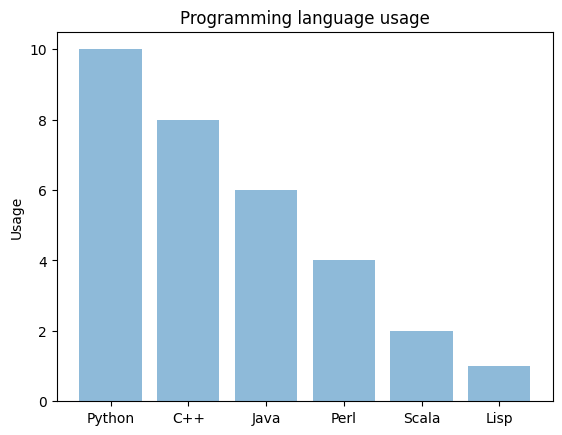

In [76]:
# Via https://pythonspot.com/matplotlib-bar-chart/

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

## Creating a Venn Diagram

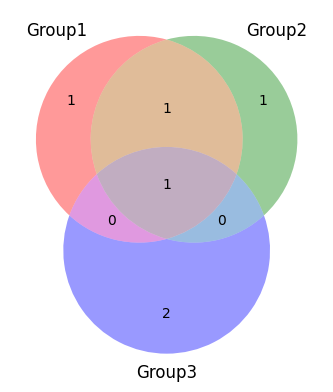

In [77]:
# Via https://stackoverflow.com/a/65486142/378622
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(['A', 'B', 'C'])
set2 = set(['A', 'B', 'D'])
set3 = set(['A', 'E', 'F'])

venn3([set1, set2, set3], ('Group1', 'Group2', 'Group3'))

plt.show()

## Marginal and Conditional Distributions

**Marginal distribution**s are totals for each row or column in a two-way table (or joint distribution table), showing the distribution of one variable. **Conditional distributions** show the distribution of one variable given a condition on the other. They're usually in percentages.

# Displaying and Describing One-Variable Quantitative Data

## Frequency Tables and Dot Plots

[How to do dot plot with matplot.](https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot)

## Histograms

A **histogram** is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data. 

## Describing the distribution of a quantitiatve variable

**Symmetric** distributions are (close to) mirrors of each other on each side of the middle of the distribution.

**Left Skewed** distributions have a tail to the left, with the high point on the right.  **Right Skewed** distributions have a tail to the right, with the high point on the right.  The skew will drag the mean to the same side as the tail, relative to the mean.

**Bimodal** distributions have two separate peaks. **Uniform** distributions are approximately the same across the x axis.  Both of these can be symmetric mind you, but these are more precise terms.

**Outliers** are data points that are way off from others.  **Clusters** are groupings of data points concentrated in a certain area.  **Peaks** are local maxima.

The **Range** is the difference between the min and max values on the distribution.


# Summary Statistics

## Mean, Median, and Mode

The **mean** is the average of the values in the data set. The **median** is the middle of the data set, or the average of the two middle values if the set is of even length.  The **mode** is the value which appears most frequently in the data set.  You can have more than one mode if there's a tie.

The median is often preferable to the mean when dealing with data that has outliers, such as salaries.

In [78]:
import statistics as st

a = np.array([10, 7, 4, 3, 3, 2, 1])

print(np.mean(a))
print(np.median(a))
print(st.mode(a))


4.285714285714286
3.0
3


## Measuring Variability

The **Interquartile Range (IQR)** describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.  Note: if the median includes two numbers, as you'll have in the even count case, then include each separate number in calculating the median of each half.

In [79]:
# Median is 10, median of lower half is 5, median of upper half is 13.  So the IQR will be 8.
nums = np.array([4,4,6,7,10,11,12,14,15])

# Via https://stackoverflow.com/a/51944636/378622 .  See explanation there of why we need a custom function rather than scipy IQR to match the formula how you see it on Khan.  There are diff interpretations of IQR
def iqr(m):
    n = m.size//2
    m_ = np.partition(m, n + 1)
    return np.median(m_[n + m.size%2:]) - np.median(m_[:n])
iqr(nums)

8.0

A **population** is the complete set of elements being studied.  A **parameter** is a characteristic of a population.  A **sample** is some subset of a population.  A **statistic** is a characteristic of a sample.

We use $n$ to indicate sample size, and $N$ to indicate population size.

The sample mean is indicated by $\bar{x}$, and population mean is indicated by $\mu$.

The **sample variance**, indicated by $S^2$ is calculated differently than the **population variance**, indicated by $\sigma^2$.  To unbias it we divide by $n-1$ rather than $n$ ([explanations here](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance)):

$$
S^2=\frac{\sum\left(x_i-\bar{x}\right)^2}{n-1}
$$

In [80]:
# Sample variance with numpy
nums = np.array([1.5, 4, 1, 2.5, 2, 1])
print(np.var(nums, ddof=1)) # Note the use of ddof=1 to provide a degree of freedom in sample variance

1.3


The **standard deviation** for a population, denoted by $\sigma$ is $\sqrt{\sigma^2}$.  The sample standard deviation, denoted by $S$ is $\sqrt{S^2}$.  Note that unlike the sample variance, we will have bias on the standard deviation because the sqrt operator is non-linear.

The standard deviation is based on deviation from the mean, so if you have outliers, you may want to look at other measures of variability that aren't so affected, such as IQR.

In [81]:
# Sample standard deviation with numpy

nums = np.array([4,3,5,7,2,9,11,7])
print(np.std(nums, ddof=1)) # Note the use of ddof=1 to provide a degree of freedom in sample variance

3.070597894314954


## Effects of linear transformations

If you add a constant to all your data, your mean and median will go up by that amount, but the standard deviation and IQR will remain the same.  If you multiply by a constant, your mean and median will also multiply by that amount, as will your standard deviation and IQR.

## Box Plots
The whiskers tell us the lowest and highest data points.  The box has the median in the middle line.  The left and right endpoints are the medians for the left and right sides.  So everything is split into quartiles, and the IQR is the length of the box.


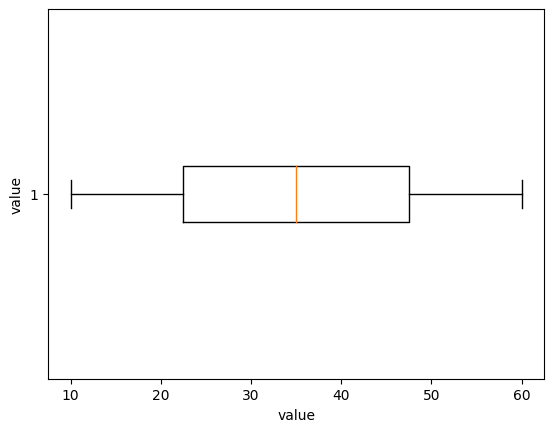

In [82]:
import matplotlib.pyplot as plt

a = [10,20,30,40,50,60]
plt.xlabel("value")
plt.ylabel("value")

plt.boxplot(a,vert=False)
plt.show()

# Percentiles, z-scores, and the normal distribution

The **z-score** is the number of standard deviations from the population mean for a particular data point:

$$z = \frac{x - \mu}{\sigma}$$

In [83]:
 from scipy import stats
 
 a = np.array([2,2,3,2,5,1,6])
 print(stats.zscore(a))


[-0.59160798 -0.59160798  0.         -0.59160798  1.18321596 -1.18321596
  1.77482393]


A **density curve** is the graph of a continuous distribution.

### Normal distributions and the empirical rule

The **normal distribution** is a probabilty density function defined as follows:

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

Note that it extends across the whole number line, from negative infinity to infinity.

The integral for this is totally nontrivial to calculate, so it's typically done numerically.  The **cumulative distribution function** (CDF) tells you the probability of getting less than a given value on the distribution.  Basically it's the integral of the distribution from negative infinity to that point.

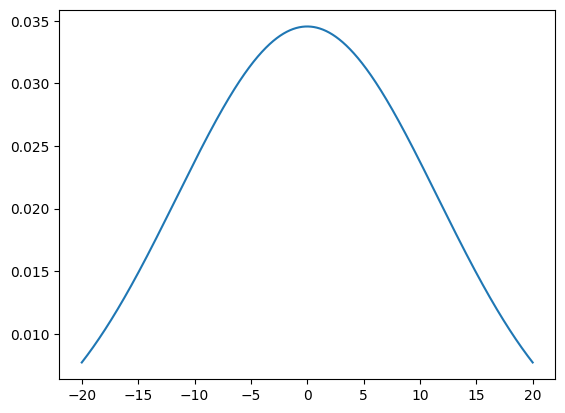

In [84]:
# Via https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-20, 20, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

The **central limit theorem** (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

The **empirical rule** (also called the "68-95-99.7 rule") is a guideline for how data is distributed in a normal distribution. The rule states that (approximately): - 68% of the data points will fall within one standard deviation of the mean. - 95% of the data points will fall within two standard deviations of the mean. - 99.7% of the data points will fall within three standard deviations of the mean. 

In [91]:
import scipy.stats as st

# Go from z-score to percentile (percentage less than that z-score)
# print(st.norm.cdf(.57))

# Go from percentile to z-score
# print(st.norm.ppf(.7157))

# Returns percentage of normal distribution less than the provided score
def score_percentile(score, mean, stdev, round_to = 4):
    z_score = (score - mean) / stdev
    return round(st.norm.cdf(z_score), round_to)

# Returns percentage of normal distribution between two provided values
def percentile_between(score_1, score_2, mean, stdev, round_to=4):
    score_1, score_2 = sorted([score_1, score_2])
    z_score_2 = (score_2 - mean) / stdev
    score_2_percentile = st.norm.cdf(z_score_2)
    z_score_1 = (score_1 - mean) / stdev
    score_1_percentile = st.norm.cdf(z_score_1)

    return round(score_2_percentile - score_1_percentile, round_to)

# print(1 - score_percentile(191, 161, 15))
# print(percentile_between(17.02, 25, 21.02, 2))

def score_at_percentile(percentile, mean, stdev, round_to = 4):
    if (percentile > 1):
        raise 'Percentile should be between 0 and 1'
    z_score = st.norm.ppf(percentile)
    score = mean + (stdev * z_score)
    return round(score, round_to)

print(percentile_between(64,76,70,6))
# print(score_at_percentile(.85, 1497, 322))


0.6827


# Exploring two-variable quantitative data

## Constructing a Scatter Plot

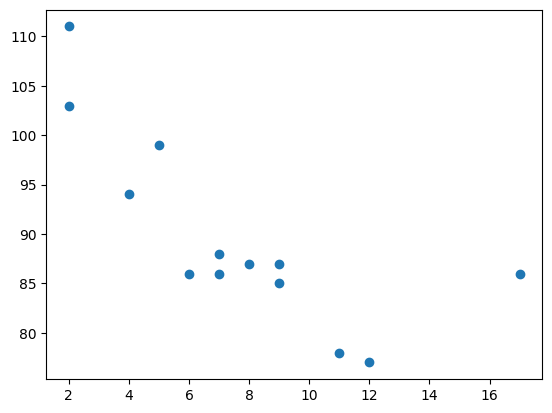

In [92]:
# Via https://www.w3schools.com/python/matplotlib_scatter.asp
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()


## Correlation

The correlation coefficient ($r$) tells us the direction and strength of the linear association between two quantitative variables.  $-1 \le r \le 1$.  

$$
r=\frac{1}{n-1} \Sigma\left(\frac{x_i-\bar{x}}{s_x}\right)\left(\frac{y_i-\bar{y}}{f_y}\right)
$$

This could be rewritten in terms of z-scores as:

$$
r = \frac{1}{n-1} \Sigma z_{x}z_{y}
$$




In [93]:
x = [1, 2, 2, 3]
y = [1, 2, 3, 6]

corr = np.corrcoef(x, y)

# Note that corrcoef returns a correlation matrix.
print(corr[0,1])

0.944911182523068


## Residuals

In linear regression, a residual is the difference between the actual value and the value predicted by the model ($y-\hat{y}$) for any given point. A least-squares regression model minimizes the sum of the squared residuals.

## Calculating the equation of a regression line

Our regression line for least squares will be of the form $\hat{y} = mx + b$. The slope $m$ is calculated as follows:

$$m = r\frac{S_y}{S_x}$$

To get $b$, we pick the point $(\bar{x}, \bar{y})$ which we know will be on the line.  Then

$$b = \bar{y} - m\bar{x}$$



In [94]:
def least_squares_equation(r, x_mean, x_std, y_mean, y_std, round_to=2):
    m = r * y_std / x_std
    b = y_mean - (m * x_mean)
    return [round(el, round_to) for el in [m, b]]

least_squares_equation(-.88, 8.9, 4.8, 74.3, 7.2)

[-1.32, 86.05]

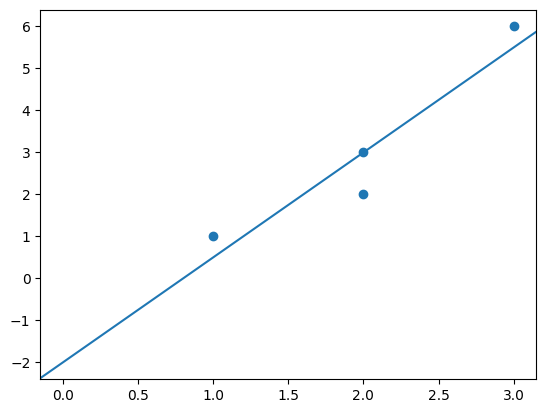

In [95]:
import matplotlib.pyplot as plt

x = [1, 2, 2, 3]
y = [1, 2, 3, 6]
m,b = np.polyfit(x, y, 1) # Fit to polynomial of degree 1 - linear regression.
plt.scatter(x, y)
plt.axline(xy1=(0, b), slope=m)
plt.show()


## Analyzing departures from linearity

$r^2$, called the **coefficient of determination**, measures how much prediction error is eliminated when we use least-squares regression.

Let RSS be the sum of squared residuals from our regression line: 

$$\text{RSS} = \sum_{i=1}^n(y_i - f(x_i))^2$$

Without regression, we'd simply plop a line down that is the mean of the $y$ data.  Let TSS be the total sum of squares -- the sum of squared differences between the observed dependent variables and the overall mean:

$$\text{TSS} = \sum_{i=1}^n(y_i - \bar{y})^2$$

Then $r^2$ will be:

$$r^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$$

The standard deviation of the residuals is a measure of how well a regression line fits the data. It is also known as **root mean square deviation** (RMSD) or **root mean square error**.  It's equation is:

$$\sqrt{\frac{\sum(\text{residuals})^2}{n-2}}$$

This statistic can be interpreted as the approximate size of the typical prediction error between the points and what the regression line predicts, or alternately as the size of the typical residual.

In [96]:
# Via https://stackoverflow.com/a/56197232
def rmsd(y, y_pred, round_to = 3):
    return round(np.sqrt(np.mean(np.square(y - y_pred))), round_to)

y = np.array([1, 2, 3, 6])
y_pred = np.array([2,-1,5,3])
print(rmsd(y,y_pred))

2.398


We can use logarithms to transform nonlinear data into a linear relationship so we can use least-squares regression methods.

# Collecting Data

We can distinguish between experiments and observational studies, and further describe types of observational studies: retrospective, prospective, and sample surveys.

An **experiment** involves actively putting people or things into a random treatment or control group.  In an experimental study, the **explanatory variable** is the variable that is manipulated by the researcher.

An **observational study** just involves collecting data to get insights, identifying statistics/correlations/etc.  A **retrospective** observational study looks at past data.  A **prospective** study picks a sample ahead of time, and tracks their data into the future.  A **survey** looks at current data, either polling or making observations.

## Potential problems with sampling

**Voluntary response sampling** causes bias because volunteers are selected by their interest.  **Response bias** occurs when people are incentivized to answer in a biased way, such as admitting something embarassing.  **Undercoverage** is when you miss out on an important part of your population. **Convenience sampling** occurs when a sample is chosen just because they are the easiest for the research to access.  **Nonresponse** bias occurs when survey participants are unwilling or unable to respond to a survey question or an entire survey.

## Random sampling and data collection

If you want to represent different groups of the population sample, you can take a random **stratified sample**, such as sampling random freshmen/sophomores/etc. to sample a student population.  **Clustered sampling** is on where you randomly select entire groups and include all units of each group in your sample.

In **systematic random sampling**, we arrange members of a population in some order, pick a random starting point, and select every member in a set interval.  Note that this approach can introduce bias, if the sample interval is not representative of the population.

## Experiment Design

The thing that is causing something else to change is the **explanatory variable**.  The thing that might get changed by that explanatory variable is the **response variable**.

Following random sampling, you can randomly assign to control and treatment groups.  Sometimes you might want to do a **block design**, where during random assignment you ensure that subgroups (such as female and male) are evenly distributed to control and treatment.

When you don't tell subjects which group they're in, that's called a **blind** study.  When the experimenters don't know the groups either, you have a **double blind** study.  In a **triple blind** study, the analysts don't even know which groups (control vs treatment) they're gathering stats on.

We never have certainty from an experimental study, just likelihood.  Good experiments are replicable, so other researchers can see if the results pan out.

Khan refers to the study design where the subjects experience both the treatment and control as "matched pairs", though this is typically referred to as a "crossover design" elsewhere, and matched pairs tends to refer to matching pairs on subgroup characteristics and assigning them to just be in the control or treatment.

# Probability

Probability is how likely something is to happen, it's the proportion of possibilities where it does.  If you have equally likely possibilities then:

$$\text{probability} = \frac{\text{\# of possibilities meeting condition}}{\text{\# of equally likely possibilities}}$$

The **sample space** of an experiment or random trial is the set of all possible outcomes or results of that experiment.  For example, if we're pulling marbles from a bag, the sample space is the set of all the marbles.

## Basic Set Operations

* $\cap$ - set intersection - similar to "And"
* $\cup$ - set union - similar to "Or"


$A - B$ or $A \ B$ is the **relative complement** of set B in A.  The complement is the things in A that are not in B.  The **absolute complement** of a set is the set of all things in your **universe** that are not in the given set.

A **subset** of a set A is any set B such that every element of B is also an element of A. A **strict subset** is a subset that isn't equal to the original set (i.e. B must have at least one fewer element than A). A **superset** of A is any set C such that A is a subset of C. 

The **addition rule for probability**: P(A or B) = P(A) + P(B) - P(A and B).

**Mutually exclusive** events are ones which cannot happen at the same time.  So if A and B are mutually exclusive, P(A and B) = 0.

**Independent events** have no effect on each other.  **The Gambler's Fallacy** mistakes past events as being dependent when they're independent.

With independent events we can multiply the probabilities of the events.  For example flipping heads twice on a coin is the product of the 1/2 probabilities, 1/4.

With **dependent events**, they have an impact on each other.  An example would be picking marbles out of a bag, with each one you pick altering subsequent probabilities.


## Conditional Probability

We write the probability of B given A as P(B|A).  For any two events (dependent or independent), we can say: $P(A and B) = P(A) \cdot P(B|A)$.  In the independent case, $P(B|A) = P(B)$.

The formula for conditional probability of P(B|A) is:

$$\frac{P(B)}{P(A)}$$

# Random variables and probability distributions

**Discrete** variables take on countable and distinct values, whereas **continuous** variables can take on any value within a data set.

The mean (or **expected value**) of a discrete random variable is the weighted average of all the outcomes of that random variable based on their probabilities. We interpret expected value as the predicted average outcome if we looked at that random variable over an infinite number of trials.

## Combining random variables

The mean of the sum of two random variables is equal to the sum of the two means, and the mean of the difference of two random variables is equal to the difference of the means.  

Assuming X and Y are independent: The variance of X + Y = Variance of X + Variance of Y, and The variance of X - Y = Variance of X + Variance of Y. In both the sum and the difference case, the resulting variance is the sum of the variances.

|  | Mean | Variance |
| :--- | :--- | :--- |
| Adding: $T=X+Y$ | $\mu_T=\mu_X+\mu_Y$ | $\sigma_T^2=\sigma_X^2+\sigma_Y^2$ |
| Subtracting: $D=X-Y$ | $\mu_D=\mu_X-\mu_Y$ | $\sigma_D^2=\sigma_X^2+\sigma_Y^2$ |

The sum of two independent normally distributed random variables is normal.

## The Binomial distribution

A **binomial variable** is made up of a finite number of independent trials, and each trial can be classified into one of two outcomes (e.g success/fail, heads/tails) of constant probability across trials.

We don't always need perfect independence to have effective independence.  The **10% Rule** says that if our sample or number of trials is $\le 10$% of the population, we have effectively independent sampling/trials.

### $k$ scores in $n$ attempts

$$P(\text{Exactly k scores in n attempts}) = \left(\begin{array}{l}
n \\
k
\end{array}\right)P(\text{score})^kP(\text{miss})^{n-k}$$


In [97]:
from math import comb
from scipy.stats import binom

def k_scores_n_attempts(k,n,p_score):
    combos = comb(n, k)
    return combos * (p_score ** k) * ((1 - p_score) ** (n-k))

print(k_scores_n_attempts(4,7,.35))
print(binom.pmf(4, 7, .35))

# Probability of less than or equal to k scores after n attempts.
def lte_k_scores_n_attempts(k,n,p_score):
    return binom.cdf(k,n,p_score)

0.14423819921874997
0.14423819921874995


The expected value of a binomial variable $E(x) = np$.  That is, the number of trials times the probability of success.  For example, if we have a 30% free throw percentage, and shoot 10 times, the expected value is 3 successful shots.

The variancec of a binomial variable is $np(1-p)$.  The [vid here](https://youtu.be/uudB5XiAYOw) works through it.

In [98]:
from math import sqrt
def binomial_variance(n, p):
    return n * p * (1-p)

print(binomial_variance(10,.3))

def binomial_stdev(n, p):
    return sqrt(binomial_variance(n,p))

2.0999999999999996


## The Geometric Distribution
A **geometric random variable** differs from a binomial random variable in that it doesn't have a fixed number of trials.  An example would be the # of rolls of a die until getting a 6.  Technically it could take an infinite number of rolls to get a 6.  Note that a geometric random variable must have the other attributes of a binomial variable, such as the probability not changing between trials.

The mean of the distribution of a geometric variable is $\frac{1}{p}$.  So with rolling a 6, the probability is $\frac{1}{6}$, so the mean is 6.  The standard deviation of the distribution of a geometric variable is $\frac{\sqrt{1 - p}{p}$

In [99]:
from math import sqrt
from scipy.stats import geom

def geometric_mean(p):
    return 1/p

def geometric_std(p):
    return sqrt(1 - p)/p

# Probability of picking a king from a deck of cards 
p = 1/13

# Probabily of picking in exactly 5 attempts [with replacement]
print(geom.pmf(5, p))

# Cumulative probability of picking within 9 attempts [with replacement]
print(geom.cdf(9, p))

# Cumulative probability of picking in more than 12 attempts [with replacement]
print(1 - geom.cdf(12, p))

0.055848076855744666
0.5134348005963147
0.38269670667709066


# Sampling Distributions

A distinction: A **probability mass function** (PMF) differs from a **probability density function** (PDF) in that the latter is associated with continuous rather than discrete random variables.

The **sampling distribution** of a given population is the distribution of frequencies of a range of different outcomes that could possibly occur for a statistic of a population.

As **sample size** increases, the sampling distribution of the sample mean gets closer to a normal distribution, and the standard deviation decreases.  With a lower sample size (<30) the sample distribution will have some of the skew that the original population had.  If you just had a sample size of 1, you'd get something just as skewed as what you started with.

The sample median is an unbiased estimator of the population median when the population is normal.  However, for a general population it is not true that the sample median is an unbiased estimator of the population median.

A **Bernoulli random variable** is the simplest kind of random variable. It can take on two values, 1 and 0. It takes on a 1 if an experiment with probability p resulted in success and a 0 otherwise. Note that a binomial random variable with parameter n=1 is equivalent to a Bernoulli random variable, i.e. there is only one trial.

A rule of thumb for the sampling distribution of sample proportions: if $np \ge 10$ and $n(1 -p) \ge 10$, we should get an approximately normal distribution of sample proportions.  When these conditions are not met, we'll get a skewed distribution.. probabilities less than 50% skewing right, and probabilities more than 50% skewing left.


In [ ]:
def sample_proportion_stdev(n, p):
    return binomial_stdev(n, p) / n

def sample_proportion_variance(n, p):
    return binomial_variance(1, p) / n

# The probability on the sampling distribution, that a sampled proportion is less than the given amount
def sample_proportion_percentile(n, p, p_sampled, round_to = 4):
    stdev = sample_proportion_stdev(n, p)
    return score_percentile(p_sampled, p, stdev, round_to)

# The probability on the sampling distribution, that a sampled proportion is between than the two given amounts
def sample_proportion_percentile_between(n, p, p_sampled_gt, p_sampled_lt, round_to = 4):
    stdev = sample_proportion_stdev(n, p)
    return percentile_between(p_sampled_gt, p_sampled_lt, p, stdev, round_to)
    
    

## Standard Error of the Mean

How much do sample means tend to vary from the average sample mean (which is equivalent to the population mean)?  The equation is quite simple:

$$\sigma^2_{\bar{x}} = \frac{\sigma^2}{n}$$

That's for the variance.  The square root of that is the **standard error of the mean**, $\sigma_{\bar{x}}$.

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

When we're looking at the sample distribution of the difference in sample means, we have variance as follows:

$$
\sigma^2_{\bar{x}_A - \bar{x}_B} = \sigma^2_{\bar{x}_A} + \sigma^2_{\bar{x}_B} = \frac{\sigma^2_A}{n} + \frac{\sigma^2_B}{n} \\
$$
$$
\sigma_{\bar{x}_A - \bar{x}_B} = \sqrt{\frac{\sigma^2_A}{n} + \frac{\sigma^2_B}{n}}
$$

Again if we have >30 samples in A and B sample mean distributions respectively, the sampling distribution of the difference of sample means is also normal.  The only way for <30 samples to be normal is if the original distribution is normal.

# Inference for categorical data: Proportions

## Confidence Intervals

For previous stuff we've known the population mean and standard deviation.  We're going to start working with confidence intervals now to indicate how confident we are that our sample statistic is within a certain distance from the population parameter we're estimating.

If we have a normal sampling distribuition, then we can say (based on the empirical rule) that there is ~95% that our statistic is within 2 standard deviations of the parameter, on the sampling distribution. Rephrasing this, there is a 95% probability that the population parameter is within 2 standard deviations of of our sampled statistic.

We estimate our **standard error** for our statistic as follows (example is with sample proportion):

$$SE_{\hat{p}} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

We'll hold off on proving this is an unbiased estimator, for now let's just accept that it is.

Our **margin of error** is how far off our estimate could be from the confidence interval, basically 2 * SE.

In [263]:
from IPython.display import display, Math, Latex
from math import ceil

def standard_error(p_sampled, n):
    return sqrt(p_sampled * (1 - p_sampled) / n)

#TODO: think I need to update MOE to use critical_value..
def margin_of_error(p_sampled, n):
    return 2 * standard_error(p_sampled, n)

def critical_value(confidence_level = 95, round_to=3):
    confidence_level = confidence_level / 100
    outside_interval_left_percentile = (1 - confidence_level) / 2
    z_score = st.norm.ppf(outside_interval_left_percentile)
    return round(-z_score,round_to)
    # 95% -> ~1.96

def confidence_level(critical_value, round_to=3):
    outside_interval_left_percentile = st.norm.cdf(-critical_value)
    outside_interval_percentile = 2 * outside_interval_left_percentile
    return round(1 - outside_interval_percentile, round_to)

def confidence_interval(p_sampled, n, confidence_level=95, round_to = 3):
    se = standard_error(p_sampled, n)
    z_crit = critical_value(confidence_level)
    display(Math(r'${p_sampled}\pm{z_crit}\sqrt{{\frac{{{p_sampled}({not_p_sampled})}}{{{n}}}}}$'.format(p_sampled=p_sampled, z_crit=z_crit, not_p_sampled=1 - p_sampled, n = n)))

    return [round(el, round_to) for el in [p_sampled - (z_crit * se), p_sampled + (z_crit * se)]]

# When we don't know p_sampled, we set it at the maximum error proportion, .5
def sample_size_for_margin_of_error(margin_of_error, confidence_level, p_sampled = .5):
    margin_of_error = margin_of_error / 100 # percentile to decimal
    z_crit = critical_value(confidence_level)
    min_sample_size = (p_sampled * (1 - p_sampled)) / ((margin_of_error / z_crit) ** 2)
    return ceil(min_sample_size)

print(confidence_interval(34/200,200,99))
# print(critical_value(92))
# print(confidence_level(1.405))
# print(critical_value(94))
#print(sample_size_for_margin_of_error(4,90))

<IPython.core.display.Math object>

[0.102, 0.238]


There are three conditions we need to satisfy before we make a one-sample z-interval to estimate a population proportion. We need to satisfy the random, normal, and independence conditions for these confidence intervals to be valid:
- Random: the sampling must be random.
- Normal: We assume that the sampling distribution has roughly a normal shape.  To make this assumption, we must expect >10 success and >10 failures each per sample.  We can literally count these in our sample.
- Independence: The 10% rule.  If we are sampling without replacement (as is usually the case), n must be < 10% of the population size.

If we want to be 95% confident, we need to build a confidence interval that extends about 2 standard errors above and below our estimate. More precisely, it's actually 1.96 standard errors. This is called a **critical value** (z*). We can calculate a critical value z* for any given confidence level using normal distribution calculations.


## Significance Tests

The null and alternative hypotheses are both statements about the population that you are studying. The **null hypothesis** ($H_0$) is often stated as the assumption that there is no change, no difference between two groups, or no relationship between two variables. The **alternative hypothesis** ($H_a$), on the other hand, is the statement that there is a change, difference, or relationship.

We compare a P-value to a **significance level** to make a conclusion in a significance test. Given the null hypothesis is true, a **p-value** is the probability of getting a result as or more extreme than the sample result by random chance alone. If a p-value is lower than our significance level, we reject the null hypothesis. If not, we fail to reject the null hypothesis.

Significance level is often denoted by alpha: $\alpha$.

Let's say we get a given sample mean $\bar{x}$.  Then our p value will be the probability of getting that sample mean, or even further from the supposed true null hypothesis mean, given that the null hypothesis were true.

You should determine your significance level before you run your experiment.

Hypotheses make claims about population parameters, not sample statistics.

A key point is that an alternative hypothesis will be easier to prove if it says the proportion is higher or lower, rather than just not equal to the null hypothesis proportion.  The not equal hypothesis needs to consider the distance from both sides of the mean of the distribution.

## Potential errors when performing tests

Both type 1 and type 2 errors are mistakes made when testing a hypothesis. A **type 1 error** occurs when you wrongly reject the null hypothesis (i.e. you think you found a significant effect when there really isn't one). It's a false positive. A **type 2 error** occurs when you wrongly fail to reject the null hypothesis (i.e. you miss a significant effect that is really there). It's a false negative.

|  | $H_0$ true | $H_0$ false |
| :--- | :--- | :--- |
| Reject $H_0$ | Type I error| Correct conclusion |
| Fail to Reject $H_0$ | Correct conclusion | Type II error |

The **power** is the probability that you are doing the right thing when the null hypothesis is not true-- the probability that you reject the null hypothesis when it is not true.  Power = P(rejecting $H_0$|$H_0$ is false).  Or could be stated as Power = 1 - P(not rejecting $H_0$|$H_0$ is false).  So we could say that power is P(not making a type II error).

There are multiple ways to increase power.  One would be to have a higher significance level. But note that this would increase the probability of Type I errors.  Another would be a larger sample size.  This is always a good thing if possible, since it doesn't increase errors, just decreases them.  Another thing that increases power is having less variability in your data set.  Yet another is if the true parameter is far from the null hypothesis.  These last 2 are not under control of the experimenter, mind you.

## Confidence intervals for the difference between two proportions

When we're taking two sample proportions, we'll need to ensure they _both_ follow the random+normal+independent criteria before proceeding to estimate the difference in proportions.

$$
\text{Confidence interval for $P_1 - P_2$} = (\hat{p}_1 - \hat{p}_2) \pm z^*\sigma_{\hat{p}_1 - \hat{p}_2}
$$
$$
\sigma_{\hat{p}_1 - \hat{p}_2} = \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
$$ 

In [264]:
def stdev_of_diff_between_proportions(p_1, n_1, p_2, n_2):
    return sqrt(
        (p_1 * (1 - p_1) / n_1) +
        (p_2 * (1 - p_2) / n_2))

def confidence_interval_for_diff_between_propotions(yes_1, n_1, yes_2, n_2, confidence_level=95, round_to=3):
    p_1 = yes_1 / n_1
    p_2 = yes_2 / n_2
    difference = p_1 - p_2
    critical_z = critical_value(confidence_level)
    stdev_of_diff = stdev_of_diff_between_proportions(p_1,n_1,p_2,n_2)
    return [round(el,round_to) for el in 
            [difference - (critical_z * stdev_of_diff),
            difference + (critical_z * stdev_of_diff)]]

print(confidence_interval_for_diff_between_propotions(54,120,26,130,95))
    

[0.138, 0.362]


When testing the difference of two population proportions, we calculate the standard deviation of the difference in proportions using the combined proportion.  This is because the null hypothesis if true indicates there's no reason to take the sampled proportions from the two groups because they are by the null hypothesis the same.  So we combine them to calculate this stat. Note that in the previous case of confidence interval, we calculated this difference using separate proportions, whereas for hypothesis testing we use the pooled proportion.  This is clarified [here](https://datasciencegenie.com/what-is-the-standard-error-of-the-difference-in-two-proportions/)

In [265]:
def stdev_of_diff_between_proportions_pooled(yes_1, n_1, yes_2, n_2):
    pooled_p = (yes_1 + yes_2) / (n_1 + n_2)
    return sqrt(
        (pooled_p * (1 - pooled_p) / n_1) +
        (pooled_p * (1 - pooled_p) / n_2))

def z_score_diff_between_pops(yes_1,n_1,yes_2,n_2):
    p_1 = yes_1 / n_1
    p_2 = yes_2 / n_2
    return (p_1 - p_2) / stdev_of_diff_between_proportions_pooled(yes_1, n_1, yes_2, n_2)

# compare can be 'gt', 'lt', or 'ne'.  'gt' means the hypothesis is that group_1 has a greater proportion than group_2.  'lt' means the hypothesis is that group_1 has a lesser proportion than group_2.  'ne' means the hypothesis is that the groups have unequal proportions. 
def p_value_of_hypothesis(yes_1,n_1,yes_2,n_2,compare):
    if compare not in ['gt', 'lt', 'ne']:
        raise Exception('Compare must be one of gt, lt, or ne')
        return
    
    z_score_diff = z_score_diff_between_pops(yes_1,n_1,yes_2,n_2)
    if compare == 'gt':
        return 1 - st.norm.cdf(z_score_diff)
    elif compare == 'lt':
        return st.norm.cdf(z_score_diff)
    else: # ne case
        if z_score_diff <= 0:
            return 2 * st.norm.cdf(z_score_diff)
        else:
            return 2 * (1 - st.norm.cdf(z_score_diff))

print(p_value_of_hypothesis(28,800, 20, 800, 'gt'))


0.12051408363221605


If the sum of your confidence level and your significance level is 100%, and you're doing a two-sided hypothesis test, you can actually make inferences about your p-value from your confidence interval.  If the null hypothesis is true, then the percent of confidence intervals that would overlap with 0 (no difference) would be at your confidence level, e.g. 95%.  Furthemore, the significance level, say 5%, tells you the percent of confidence intervals that would _not_ overlap with 0.  So we can say that the p-value is less than the significance level in the non-overlap cases.  To simply summarize, you know which side of the significance level the p-value is on based on whether 0 is in your confidence interval.  

# Inference for quantitative data: Means

We've seen prior that when we're sampling a population to estimate its parameters with statistics.  We've also seen that we can construct a confidence interval about that statistic with some confidence level.  That confidence interval takes the form:

$$\text{statistic} \pm z^*\sigma_{\text{statistic}}$$

In the last unit, we looked at sample proportions, and constructed an interval with an estimate for the standard error: $\hat{p} \pm z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.  Now that we're dealing with the mean rather than proportion, we'd like to use the sample standard deviation with $\bar{x} \pm z^*\frac{s}{\sqrt{n}}$ , but doing so underestimates the actual interval.

That's why statisticians introduced the t-statistic.  What we do is:

$$\bar{x} \pm t^*\frac{s}{\sqrt{n}}$$

This will give us the proper confidence interval for the estimating the population mean.  

Note that the z technique works if we know the population standard deviation, but we typically don't.  That's when we use t-stats.

Conditions for valid t-intervals:
- The data is a random sample from the population of interest
- The sampling distribution of $\bar{x}$ is approximately normal. This is true if the parent population is normal (regardless of sample size) or if sample is reasonably large ($\ge 30$).  In practice we often don't know about the parent population's normality, though we can make inferences from the sample distribution.  If the sample distribution is skewed and under 30, we don't satisfy the normal condition.
- Individual observations can be considered independent (less than 10% of population rule of thumb, when there's no replacement).

The random condition is perhaps the most important. If we break the random condition, there is probably bias in the data. The only reliable way to correct for a biased sample is to recollect the data in an unbiased way.
The other two conditions are important, but if we don't meet the normal or independence conditions, we may not need to start over. For example, there is a way to correct for the lack of independence when we sample more than 
10% of a population, but it's beyond the scope of what we're learning right now.


In [287]:
def critical_value_t(n, confidence_level = 95, round_to = 3):
    confidence_level = confidence_level / 100
    outside_interval_left_percentile = (1 - confidence_level) / 2
    # This function st.t.ppf provides the t-score corresponding to a given percentile.
    t_score = st.t.ppf(outside_interval_left_percentile, n-1)
    return round(-t_score, round_to)

def confidence_interval_for_mean(sample_mean, n, sample_stdev, confidence_level = 95, round_to=3):
    t_crit = critical_value_t(n, confidence_level, round_to)
    margin = t_crit * sample_stdev / sqrt(n)
    display(Math(r'${sample_mean}\pm{margin}$'.format(sample_mean = sample_mean, margin=round(margin, round_to))))
    return [round(el, round_to) for el in [sample_mean - margin, sample_mean + margin]]

# print(critical_value_t(10,99))
# print(confidence_interval_for_mean(200.4,15,0.8,95))

3.25


<IPython.core.display.Math object>

[199.957, 200.843]
